INTRODUCTION TO NEURAL NETWORK CLASSIFICATION

from: https://www.youtube.com/watch?v=r3aZBohotF8&t=210s

Dataset: https://www.kaggle.com/datasets/shelvigarg/wine-quality-dataset?resource=download

In [16]:
import numpy as np
import pandas as pd
df=pd.read_csv('assets/winequalityN.csv')


In [17]:
df.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4405,white,5.9,0.29,0.16,7.9,0.044,48.0,197.0,0.99512,3.21,0.36,9.4,5
4696,white,6.1,0.15,0.40,1.2,0.030,19.0,84.0,0.98926,3.19,0.96,13.0,6
2815,white,6.6,0.36,0.24,0.9,0.038,15.0,72.0,0.99066,3.23,0.39,11.0,5
6203,red,7.5,0.61,0.26,1.9,0.073,24.0,88.0,0.99612,3.30,0.53,9.8,5
5077,red,8.8,0.61,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,5


In [18]:
#lets check if there are any missing values
df.isnull().sum() #The df.isnull().sum() function in pandas is used to count the number of missing (NaN) values in each column of a DataFrame. 

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [19]:
df=df.dropna()

In [20]:
#finding the shape of the dataset
df.shape

(6463, 13)

In [21]:
df['type'].value_counts()

type
white    4870
red      1593
Name: count, dtype: int64

In [22]:
'''The line of code you provided is used to create a new column in the DataFrame df named is_white_value. This new column will contain 1 if the corresponding value in the type column is 'white', and 0 otherwise.'''
df['is_white_value']=[1 if typ =='white' else 0 for typ in df['type']]

In [23]:
#The df.drop('type', axis=1, inplace=True) line of code is used to remove the column named type from the DataFrame df and modify the DataFrame in place (i.e., without creating a new DataFrame).
df.drop('type',axis=1,inplace=True)

In [24]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_white_value
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [26]:
#The df['quality'].value_counts() function in pandas is used to count the unique values in the quality column of the DataFrame df and return the counts in descending order.
df['quality'].value_counts()


quality
6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: count, dtype: int64

In [27]:
df['is_good_wine']=[1 if quality>=6 else 0 for quality in df['quality']]


In [28]:
df.drop('quality',axis=1,inplace=True)

In [32]:
df.sample(12)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_white_value,is_good_wine
3738,5.6,0.26,0.18,1.4,0.034,18.0,135.0,0.99174,3.32,0.35,10.2,1,1
4567,5.8,0.28,0.66,9.1,0.039,26.0,159.0,0.99650,3.66,0.55,10.8,1,0
5842,8.3,0.30,0.49,3.8,0.090,11.0,24.0,0.99498,3.27,0.64,12.1,0,1
5412,10.5,0.51,0.64,2.4,0.107,6.0,15.0,0.99730,3.09,0.66,11.8,0,1
2441,7.2,0.20,0.28,1.6,0.028,13.0,168.0,0.99203,3.17,1.06,11.5,1,1
1668,7.9,0.18,0.33,1.2,0.033,20.0,72.0,0.99220,3.12,0.38,10.5,1,1
2877,6.5,0.15,0.55,5.9,0.045,75.0,162.0,0.99482,2.97,0.40,9.3,1,0
911,6.2,0.33,0.19,5.6,0.042,22.0,143.0,0.99425,3.15,0.63,9.9,1,0
5964,6.6,0.52,0.08,2.4,0.070,13.0,26.0,0.99358,3.40,0.72,12.5,0,1
1586,9.3,0.31,0.49,1.3,0.042,34.0,147.0,0.99480,3.11,0.46,9.8,1,0


In [34]:
from sklearn.model_selection import train_test_split

X=df.drop('is_good_wine',axis=1)
y=df['is_good_wine']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [35]:
X_train.shape,X_test.shape


((5170, 12), (1293, 12))

DATA SCALING
so features like sulfates and citric acid have values close to zero while total sulfur dioxide is in 100s, it will confuse the nueural netwok if you leave them as such itll think of it a feature on a higher scaler is more important theres, where scaling comes into place.

Standardization (Z-score normalization):

Method: Transforms data to have a mean of 0 and a standard deviation of 1.

Use Case: Works well when data is normally distributed, or when features are not bound to a specific range.

In [ ]:
#The df['quality'].value_counts() function in pandas is used to count the unique values in the quality column of the DataFrame df and return the counts in descending order.
df['quality'].value_counts()

quality
6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: count, dtype: int64

In [39]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data based on the fit from training data
X_test_scaled = scaler.transform(X_test)


In [38]:
X_train_scaled[:3]

array([[-0.86265684,  0.56588915,  0.22079121,  0.75048207,  0.07674805,
         2.9415276 ,  2.35882933,  0.788386  ,  0.94784355, -0.20357893,
        -1.66472797,  0.57094748],
       [ 0.99186667, -1.02945526,  2.92098728, -0.3929423 , -0.17512717,
        -0.08344183,  0.21383119, -0.64578381,  0.38700578, -0.87653487,
         1.63149383,  0.57094748],
       [-1.55810316, -0.72265826,  0.98238498,  0.14758559,  0.27265101,
         0.5887736 ,  1.25973937, -0.37229096, -0.17383198, -0.74194369,
        -0.62233304,  0.57094748]])

lets keep in mind when training a binary classification model the first one in the output layer structure we'll want to have one neuron activated by a sigmoid function , this will output our probability you can then assign to either a good wine if the probability is higher than let's say 0.5 and to a bad wine and otherwise the second  one is the loss funciton binary cross entropy is the one you want to go with dont mistake it for categorical cross-entropy as you would you that one when you have multiple categories, and finally there is a question of class balance ask yourself are the classes in the target variable balanced in other words do we have roughly the same number of good and bad wines if not the accuracy might not be the best evaluation metric well also use precision and recall , lets define the neural network model ...

In [40]:
import tensorflow as tf
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
              metrics=[
                  tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                  tf.keras.metrics.Precision(name='precision'),
                  tf.keras.metrics.Recall(name='recall'),   
              ]
              )

history= model.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6828 - loss: 0.6705 - precision: 0.7273 - recall: 0.8044
Epoch 2/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7342 - loss: 0.5376 - precision: 0.7681 - recall: 0.8359
Epoch 3/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7439 - loss: 0.5223 - precision: 0.7911 - recall: 0.8131
Epoch 4/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7395 - loss: 0.5202 - precision: 0.7745 - recall: 0.8340
Epoch 5/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7589 - loss: 0.5064 - precision: 0.7884 - recall: 0.8496
Epoch 6/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7380 - loss: 0.5274 - precision: 0.7682 - recall: 0.8438
Epoch 7/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7606 - loss: 0.5066 - precision: 0.7916 - recall: 0.8473
Epoch 8/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7569 - loss: 0.5036 - precision: 0.7796 - recall: 0.8626
Epoch 9/

In [43]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18,8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

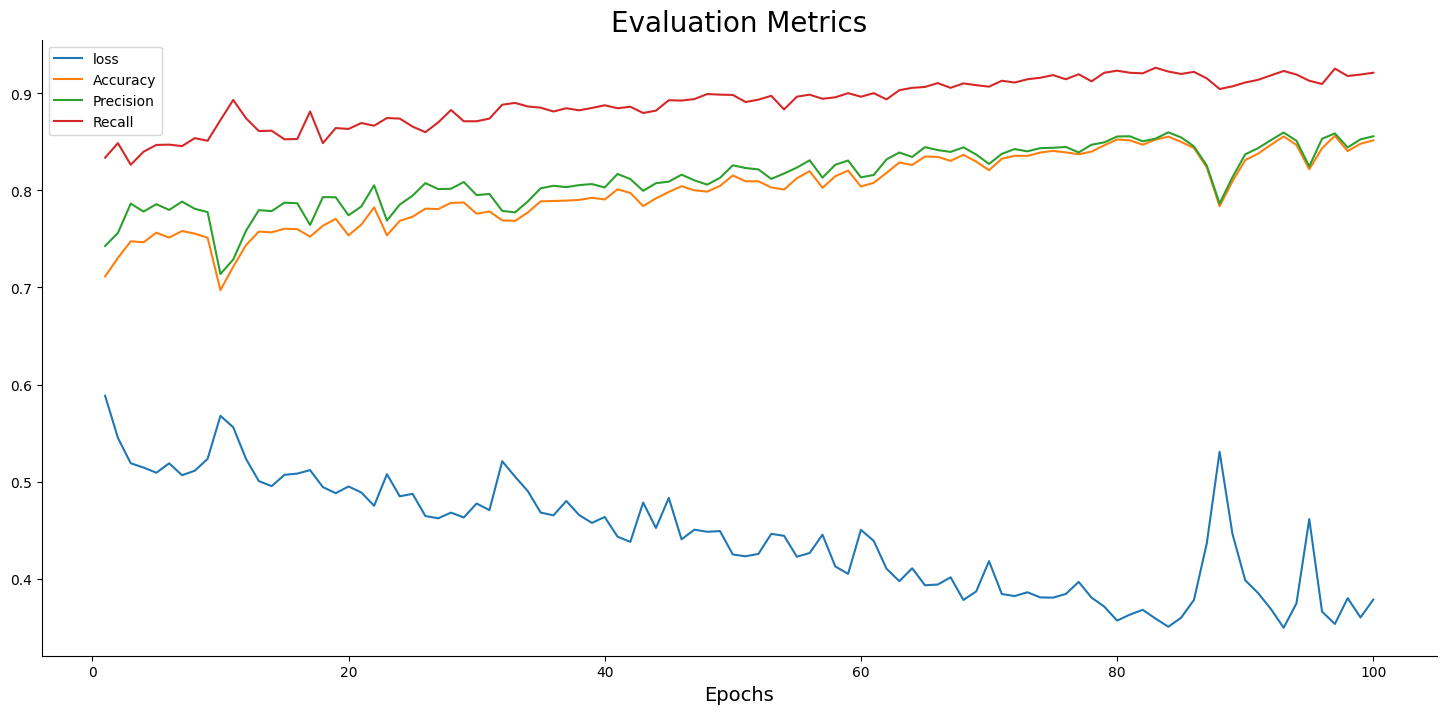

In [45]:
plt.plot(np.arange(1,101),history.history['loss'],label='loss')
plt.plot(np.arange(1,101),history.history['accuracy'],label='Accuracy')
plt.plot(np.arange(1,101),history.history['precision'],label='Precision')
plt.plot(np.arange(1,101),history.history['recall'],label='Recall')
plt.title('Evaluation Metrics', size=20)
plt.xlabel('Epochs', size=14)
plt.legend();

In [46]:
prediction=model.predict(X_test_scaled)
prediction

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[0.55948913],
       [0.6621871 ],
       [0.9220225 ],
       ...,
       [0.9220225 ],
       [0.00455374],
       [0.15088375]], dtype=float32)

In [50]:
prediction_classes=[1 if prob>0.5 else 0 for prob in np.ravel(prediction)]

In [51]:
prediction_classes[:10]

[1, 1, 1, 1, 1, 0, 1, 1, 1, 1]

In [52]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,prediction_classes))

[[252 230]
 [ 79 732]]


In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Assuming y_test and prediction_classes are defined
accuracy = accuracy_score(y_test, prediction_classes)
precision = precision_score(y_test, prediction_classes)
recall = recall_score(y_test, prediction_classes)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')


Accuracy: 0.76
Precision: 0.76
Recall: 0.90
